In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_csv("collegePlace.csv")

In [4]:
data


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


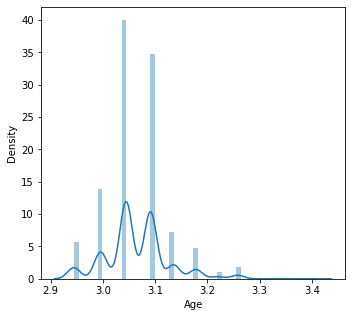

In [6]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(data['Age']))

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
oe=OrdinalEncoder()

In [9]:
data[['Gender']]=oe.fit_transform(data[['Gender']])


In [10]:
data[['Stream']]=oe.fit_transform(data[['Stream']])

In [11]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


# univariate analysis

C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

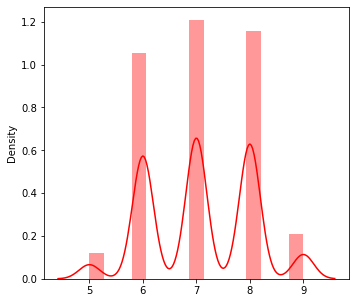

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['CGPA']],color='r')

C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

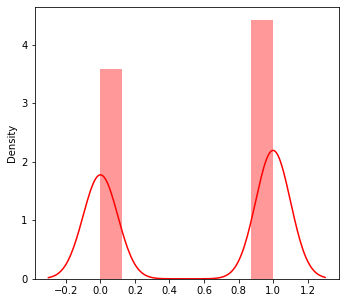

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['PlacedOrNot']],color='r')

# bivariate analysis

C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


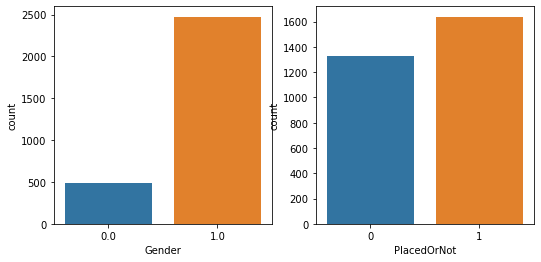

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['PlacedOrNot'])
plt.show()

# multivariate analysis

C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

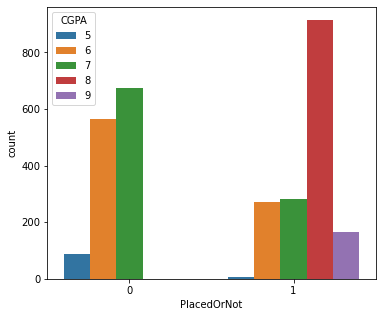

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['PlacedOrNot'],hue=data['CGPA'])

C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PAVANI\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='CGPA'>

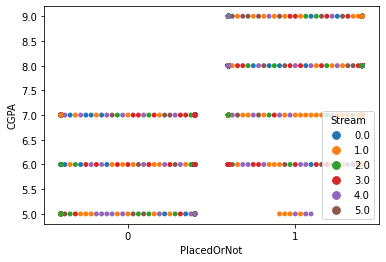

In [16]:
sns.swarmplot(data['PlacedOrNot'],data['CGPA'],hue=data['Stream'])

In [17]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


# scaling

In [18]:
sc=StandardScaler()

In [19]:
data[['Age']]=sc.fit_transform(data[['Age']])

In [20]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.388131,1.0,3.0,1,8,1,1,1
1,-0.366752,0.0,1.0,0,7,1,1,1
2,0.388131,0.0,4.0,1,6,0,0,1
3,-0.366752,1.0,4.0,0,8,0,1,1
4,0.388131,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0,0
2962,1.143013,1.0,5.0,1,7,1,0,0
2963,0.388131,1.0,4.0,1,7,0,0,0
2964,0.388131,1.0,1.0,1,7,0,0,0


# splotting the data into train and test

In [21]:
X=data.iloc[:,0:-1]

In [22]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,1.0,3.0,1,8,1,1
1,-0.366752,0.0,1.0,0,7,1,1
2,0.388131,0.0,4.0,1,6,0,0
3,-0.366752,1.0,4.0,0,8,0,1
4,0.388131,1.0,5.0,0,8,1,0
...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0
2962,1.143013,1.0,5.0,1,7,1,0
2963,0.388131,1.0,4.0,1,7,0,0
2964,0.388131,1.0,1.0,1,7,0,0


In [23]:
y=data.iloc[:,-1:]

In [24]:
y

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=16)

In [26]:
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1879,0.388131,1.0,4.0,0,8,0,1
1710,0.388131,1.0,5.0,1,5,0,0
1764,1.143013,1.0,0.0,0,6,0,1
187,-0.366752,1.0,1.0,1,6,0,0
1582,-0.366752,1.0,5.0,1,5,1,0
...,...,...,...,...,...,...,...
635,0.388131,1.0,2.0,2,8,0,0
1345,2.652777,1.0,1.0,1,7,0,0
581,-0.366752,1.0,0.0,1,8,0,0
2169,0.388131,1.0,4.0,1,5,1,0


In [27]:
y_train

,PlacedOrNot
1879,1
1710,0
1764,0
187,0
1582,0
...,...
635,1
1345,1
581,1
2169,0


In [28]:
X_test

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2059,-0.366752,1.0,1.0,0,8,0,0
1004,0.388131,1.0,2.0,2,6,0,0
2173,-1.121634,0.0,1.0,0,9,1,1
994,-0.366752,1.0,4.0,1,6,1,1
890,0.388131,1.0,3.0,0,8,0,0
...,...,...,...,...,...,...,...
2003,-1.876516,1.0,1.0,0,8,0,0
1496,-0.366752,1.0,2.0,2,8,0,1
2065,-0.366752,1.0,4.0,2,7,0,1
1228,0.388131,1.0,5.0,0,9,1,1


In [29]:
y_test

,PlacedOrNot
2059,1
1004,1
2173,1
994,1
890,1
...,...
2003,1
1496,1
2065,0
1228,1


# model building

# svm

In [30]:
from sklearn.svm import SVC

In [31]:
svm=SVC(kernel='linear')

In [32]:
svm.fit(X_train,y_train)

C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [33]:
pred_test=svm.predict(X_test)
pred_train=svm.predict(X_train)

In [34]:
train_accuracy=accuracy_score(pred_train,y_train)
test_accuracy=accuracy_score(pred_test,y_test)

In [35]:
print("accuracy on training data is",train_accuracy)
print("accuracy on testing data is",test_accuracy)

accuracy on training data is 0.7765598650927488
accuracy on testing data is 0.7474747474747475


# knn

In [36]:
best_k=0
best_score=0
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,y_train)
    knn_temp_predict=knn_temp.predict(X_test)
    score=accuracy_score(y_test,knn_temp_predict)*100
    if score>best_score and score<100:
        best_score=score
        best_k=k
print("k=",best_k)
print("accuracy=",best_score)

C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 11
accuracy= 87.37373737373737


C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

# ann

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy

In [38]:
classifier=Sequential()
classifier.add(Dense(7,activation='relu',input_dim=7))
classifier.add(Dropout(0.50))
classifier.add(Dense(7,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))

In [39]:
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])

In [40]:
classifier.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 1.0088 - accuracy: 0.4937
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.4996
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.5093
Epoch 4/100
119/119 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5270
Epoch 5/100
119/119 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5101
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5135
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5190
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5194
Epoch 9/100
119/119 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5282
Epoch 10/100
119/119 [==============================] - 0s 1ms/step - loss: 0.6798 - accura

119/119 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.6522
Epoch 82/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6492
Epoch 83/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.6467
Epoch 84/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.6623
Epoch 85/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.6547
Epoch 86/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.6450
Epoch 87/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.6501
Epoch 88/100
119/119 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.6526
Epoch 89/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6606
Epoch 90/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 

In [64]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def placement_model(input_data):
   
    knn_temp=KNeighborsClassifier(n_neighbors=best_k)
    knn_temp.fit(X_train,y_train)
    input_data_2d = np.array(input_data).reshape(1, -1)
    knn_temp_predict=knn_temp.predict(input_data_2d)
    
    if knn_temp_predict ==0:
        return "not placed"
    else:
        return "placed"
    

def preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs):
    
    le = LabelEncoder()
    gender = le.fit_transform([Gender])[0] if Gender else 0
    stream = le.fit_transform([Stream])[0] if Stream else 0
    
    sc = StandardScaler()
    age = sc.fit_transform([[Age]])[0][0]

    input_data = [age, gender, stream, Internships, CGPA, Hostel, HistoryOfBacklogs]
    
    return input_data

inputs = ["number", "text", "text", "number", "number", "number", "number"]
outputs = "text" 
gr_interface = gr.Interface(
    fn=lambda Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs: 
        placement_model(preprocess_data(Age, Gender, Stream, Internships, CGPA, Hostel, HistoryOfBacklogs)),
    inputs=inputs,
    outputs=outputs,
    live=True 
)

gr_interface.launch()


C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(
C:\Users\PAVANI\anaconda3\lib\site-packages\gradio\blocks.py:233: UserWarning: api_name predict already exists, using predict_6
  warnings.warn(


Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\PAVANI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n